<a href="https://colab.research.google.com/github/ArtuomMerkulov/Clients_Telegram_bot/blob/main/%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B7%D0%B0%D1%8F%D0%B2%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка текстов нейронными сетями: классификация заявок

##Импорт библиотек

In [ ]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Кодирование тестовых меток
from sklearn.preprocessing import LabelEncoder

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

## Загрузка датасета и подготовка данных

In [ ]:
# Загрузка данных из файла в таблицу
df = pd.read_csv('/content/Парсинг_rawDataSet №3.csv')

In [ ]:
# Вывод размерности таблицы
print(df.shape)

(42410, 8)


In [ ]:
# Вывод первых строк таблицы
df

,Категория,Сервисдеск,Автор заявки,Заявка,Описание заявки,Отдел,Группа,Площадка
0,Бизнес приложения,DocsVision,Protopopov Nikolay,Предоставить актуальные версии дистрибутивов D...,Предоставить актуальные версии дистрибутивов D...,Executive management,Группа поддержки DocsVision,LightHouse
1,Бизнес приложения,DocsVision,Rumyantseva Varvara,ошибка в расчетах автоматических маршрутов по ...,"<span><font color=""#333333"" face=""Arial"">Прошу...",Document support devision,Группа поддержки DocsVision,LightHouse
2,Инфраструктурные сервисы,Рабочая станция,Davydova Maria,Установка переадресации на рабочий телефон,<span>Добрый день </span><br /><br /><span>Вы ...,PR Department,Группа системных администраторов,LightHouse
3,Бизнес приложения,1С.БУХ,Tugareva Olga,Право доступа в базы Валитовой Э,"<span><span style=""WHITESPACE: normal; WORDSPA...",Financial Department,Группа технической поддержки,LightHouse
4,Бизнес приложения,1С.Request,Stratonnikova Svetlana,Ежемесячный бюджет ДБУ,"<span><span style=""font: 14px/20px Arial sanss...",Financial Division,Группа разработки 1С,LightHouse
...,...,...,...,...,...,...,...,...
42405,Инфраструктурные сервисы,Доступ к файлам,Kotomina Marina,W:\Legal Dep\Проекты\Corporate docs\Резиденты\...,"<img src=""/inlineimages/WorkOrder/76987/169029...",Treasury,Группа технической поддержки,LightHouse_O1Properties
42406,Инфраструктурные сервисы,Почта,Zhilina Natalya,прошу восстановить почтовый ящик sales@fmservi...,<html> <body> <div> <p>Добрый день</p> <p>Ран...,LightHouse,Группа технической поддержки,Vivaldi_FM-Solution
42407,Общее,Профилактическое обслуживание,Bortnikov Sergey,БЦ Лайтхаус (О1 Пропертиз): Ежедневный обход,1 Выполнить ежедневный обход переговорных и пр...,IT Department,Группа технической поддержки,LightHouse_O1Properties
42408,Кадровые изменения,Прием на работу,Serzhan Elizaveta,Выход нового сотрудника ФИО: Короляк Данил М...,<span>ФИО сотрудника: Короляк&nbsp; Данил&nbsp...,HR,Группа технической поддержки,SilverCity_Deidwood


In [ ]:
# Проверка, есть ли пропуски в данных
print(df.isnull().sum())

Категория          0
Сервисдеск         0
Автор заявки       0
Заявка             1
Описание заявки    1
Отдел              0
Группа             0
Площадка           0
dtype: int64


In [ ]:
# Есть пропуски. Замена всех пустых значений на 'нет данных'
df.fillna('нет данных', inplace=True)

In [ ]:
# Пример данных из таблицы
print(df.values[20654])

['Инфраструктурные сервисы' 'Доступ к файлам' 'Grachev Sergey'
 'Прошу предоставить доступ к папке: S:\\Application\\Drivers'
 '<span><span><br />1 Укажите путь к ресурсу куда хотите получить доступ в боксе расположенном ниже Либо в теме заявке</span><br />S:\\Application\\Drivers<br /></span><span><br /><span><font face="Times New Roman" size="3"></font></span>2 Выберите тип доступа в боксе расположенном ниже<br /><span>&nbsp;</span></span><br /><span><span></span><br /><br /></span><br />'
 'Helpdesk division' 'Группа технической поддержки' 'LightHouse']


In [ ]:
# Заменяем значение "Группа поддержки DocsVision" на "Группа технической поддержки"
df['Группа'] = df['Группа'].replace('Группа технической поддержки FM Solution', 'Группа технической поддержки')
df['Группа']

0             Группа поддержки DocsVision
1             Группа поддержки DocsVision
2        Группа системных администраторов
3            Группа технической поддержки
4                    Группа разработки 1С
                       ...               
42405        Группа технической поддержки
42406        Группа технической поддержки
42407        Группа технической поддержки
42408        Группа технической поддержки
42409        Группа технической поддержки
Name: Группа, Length: 42410, dtype: object

##Модель на наборе данных без балансировки и фильтрации

In [ ]:
# Функция вывода сводки по распределению данных
def data_summary(df, class_labels):
    for cls in class_labels:
        print(f'Количество записей класса {cls}: {df[df.Группа == cls].shape[0]}')

In [ ]:
# Сводка по распределению данных
data_summary(df, df.Группа.unique())

Количество записей класса Группа поддержки DocsVision: 2
Количество записей класса Группа системных администраторов: 1637
Количество записей класса Группа технической поддержки: 29005
Количество записей класса Группа разработки 1С: 8663
Количество записей класса Группа поддержки Тесса: 1049
Количество записей класса Группа проектных менеджеров: 890
Количество записей класса Группа сопровождения интранет портала: 393
Количество записей класса Группа поддержки Сервиса печати: 771


###Преобразование текстовых данных в числовые и векторные представления для обучения нейросети

In [ ]:
# Задание параметров преобразования
VOCAB_SIZE = 10000                  # Объем словаря для токенизатора
TRAIN_TEST_RATIO = 0.30                   # Доля проверочной выборки в основном наборе

**Токенизация и преобразование в последовательности**

In [ ]:
# Извлечение всех записей-текстов обращений и их меток классов
text_data = df.Заявка.tolist()
class_data = df.Группа.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 18094
Список классов: ['Группа поддержки DocsVision' 'Группа поддержки Сервиса печати'
 'Группа поддержки Тесса' 'Группа проектных менеджеров'
 'Группа разработки 1С' 'Группа системных администраторов'
 'Группа сопровождения интранет портала' 'Группа технической поддержки']
Всего классов: 8
Форма выходных данных: (42410,)
Пример числовых меток классов: [0 0 5 7 4 5 4 4 4 4]


In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape)
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape)
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(42410,)
[9, 6102, 941, 8757, 6103]
(42410, 10000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(42410, 8)
[1. 0. 0. 0. 0. 0. 0. 0.]


**Создание обучающей и тестовой выборок**

In [ ]:
# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(x_data))),
                                       stratify=y_data,
                                       test_size=TRAIN_TEST_RATIO)

# Разделение в соответствии с полученными индексами
x_train, x_test = x_data[idx_train], x_data[idx_test]
x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
y_train, y_test = y_data[idx_train], y_data[idx_test]

# Проверка результата
print(x_train.shape, x_test.shape)
print(x_train_01.shape, x_test_01.shape)
print(y_train.shape, y_test.shape)

(29687,) (12723,)
(29687, 10000) (12723, 10000)
(29687, 8) (12723, 8)


###Сервисные функции


In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=35,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=9,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=8)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные группы', fontsize=6)
    plt.ylabel('Верные группы', fontsize=6)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<9} {:3.0f}% сеть отнесла к группе {:<9} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=35,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

##Модель на отфильтрованном и сбалансированном наборе данных

---



###Фильтрация и балансировка данных

In [ ]:
# Сводка по распределению данных в порядке кодированных меток
data_summary(df, CLASS_LIST)

Количество записей класса Группа поддержки DocsVision: 2
Количество записей класса Группа поддержки Сервиса печати: 771
Количество записей класса Группа поддержки Тесса: 1049
Количество записей класса Группа проектных менеджеров: 890
Количество записей класса Группа разработки 1С: 8663
Количество записей класса Группа системных администраторов: 1637
Количество записей класса Группа сопровождения интранет портала: 393
Количество записей класса Группа технической поддержки: 29005


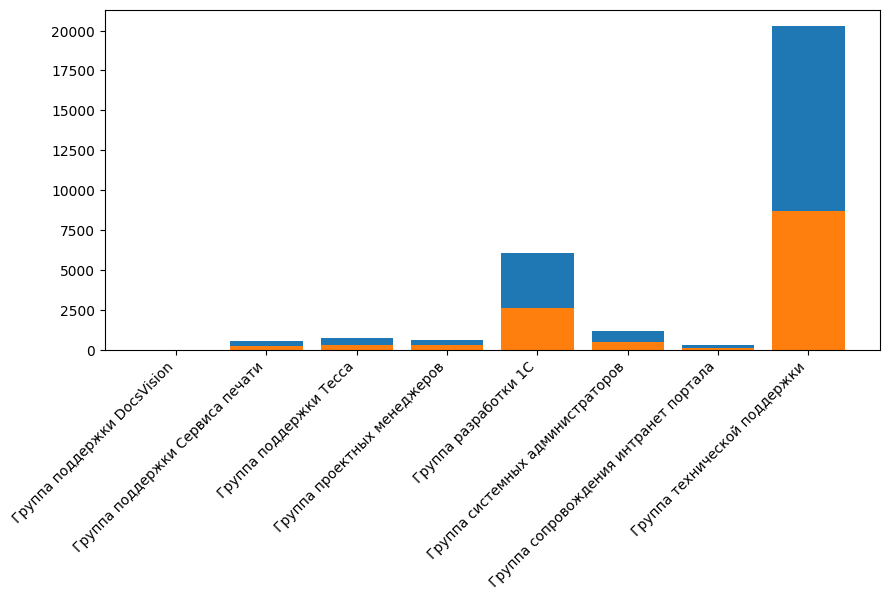

In [ ]:
# Проверка сбалансированности выборок по классам
fig = plt.figure(figsize=(10, 5))
c_train = np.bincount(np.argmax(y_train, axis=1))
c_test = np.bincount(np.argmax(y_test, axis=1))
plt.bar(CLASS_LIST, c_train)
plt.bar(CLASS_LIST, c_test)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
# Назначение интервала допустимого количества текстов по классу
text_count_interval = [850, 1050]

# Фильтрация данных - отбрасываются все данные без категории
# и все классы объемом менее нижней границы разрешенного интервала
class_to_drop = ['нет данных']
for cls in df.Группа.unique():
    if df[df.Группа == cls].shape[0] < text_count_interval[0]:
        class_to_drop.append(cls)

print(f'Удаляются классы: {class_to_drop}')

del_mask = df.Группа.isin(class_to_drop)
df = df[~del_mask]

# По всем оставшимся классам количество примеров ограничивается не более
# верхней границы разрешенного интервала
for cls in df.Группа.unique():
    df = df.drop(df[df.Группа == cls].index[text_count_interval[1]:])

Удаляются классы: ['нет данных', 'Группа поддержки DocsVision', 'Группа сопровождения интранет портала', 'Группа поддержки Сервиса печати']


In [ ]:
data_summary(df, df.Группа.unique())

Количество записей класса Группа системных администраторов: 1050
Количество записей класса Группа технической поддержки: 1050
Количество записей класса Группа разработки 1С: 1050
Количество записей класса Группа поддержки Тесса: 1049
Количество записей класса Группа проектных менеджеров: 890


**Токенизация и преобразование в последовательности**

In [ ]:
text_data = df.Заявка.tolist()
class_data = df.Группа.tolist()

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+-–—/…<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
# Кодирование меток классов индексами (числами)
encoder = LabelEncoder()
class_labels = encoder.fit_transform(class_data)

CLASS_LIST = encoder.classes_
CLASS_COUNT = len(CLASS_LIST)

print(f'Размер словаря: {len(items)}')
print(f'Список классов: {CLASS_LIST}')
print(f'Всего классов: {CLASS_COUNT}')
print(f'Форма выходных данных: {class_labels.shape}')
print(f'Пример числовых меток классов: {class_labels[:10]}')

Размер словаря: 5216
Список классов: ['Группа поддержки Тесса' 'Группа проектных менеджеров'
 'Группа разработки 1С' 'Группа системных администраторов'
 'Группа технической поддержки']
Всего классов: 5
Форма выходных данных: (5089,)
Пример числовых меток классов: [3 4 2 3 2 2 2 2 2 2]


In [ ]:
# Преобразование входных текстов в последовательности индексов (для архитектур с embedding)
# Применено приведение к массиву объектов для дальнейшего разделения на выборки
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape)
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_data_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_data_01.shape)
print(x_data_01[0, :20])

# Преобразование меток класса к векторам one hot encoding
y_data = utils.to_categorical(class_labels, CLASS_COUNT)
# Вывод формы и примера данных
print(y_data.shape)
print(y_data[0])

(5089,)
[100, 1040, 7, 826, 126]
(5089, 10000)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(5089, 5)
[0. 0. 0. 1. 0.]


**Создание обучающей и проверочной выборки**

In [ ]:
# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(x_data))),
                                       stratify=y_data,
                                       test_size=TRAIN_TEST_RATIO)

# Разделение в соответствии с полученными индексами
x_train, x_test = x_data[idx_train], x_data[idx_test]
x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
y_train, y_test = y_data[idx_train], y_data[idx_test]

# Проверка результата
print(x_train.shape, x_test.shape)
print(x_train_01.shape, x_test_01.shape)
print(y_train.shape, y_test.shape)

(3562,) (1527,)
(3562, 10000) (1527, 10000)
(3562, 5) (1527, 5)


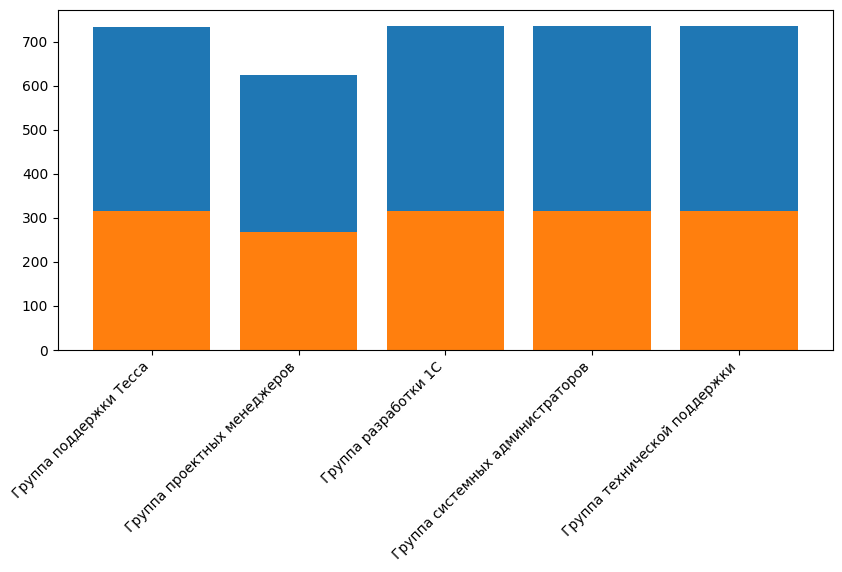

In [ ]:
# Проверка сбалансированности выборок по классам
fig = plt.figure(figsize=(10, 5))
c_train = np.bincount(np.argmax(y_train, axis=1))
c_test = np.bincount(np.argmax(y_test, axis=1))
plt.bar(CLASS_LIST, c_train)
plt.bar(CLASS_LIST, c_test)
fig.autofmt_xdate(rotation=45)
plt.show()

### BagOfWords + Dense

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               4000400   
                                                                 
 dropout_3 (Dropout)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 600)               240600    
                                                                 
 dropout_4 (Dropout)         (None, 600)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               120200    
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                

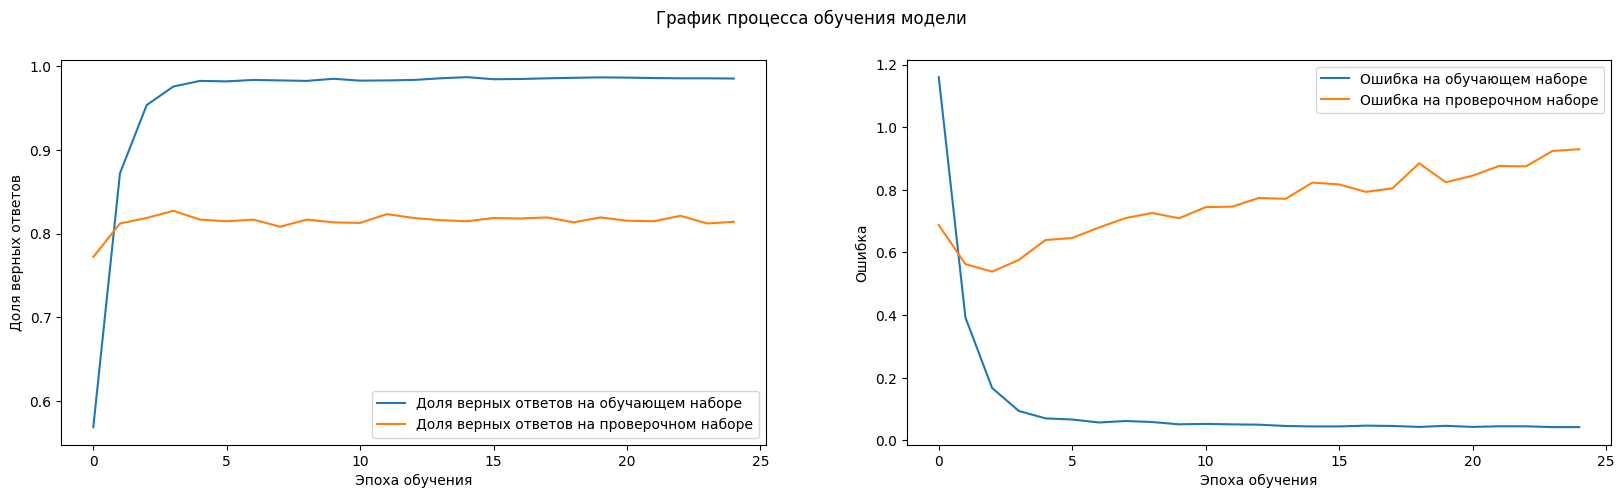

48/48 [==============================] - 0s 3ms/step


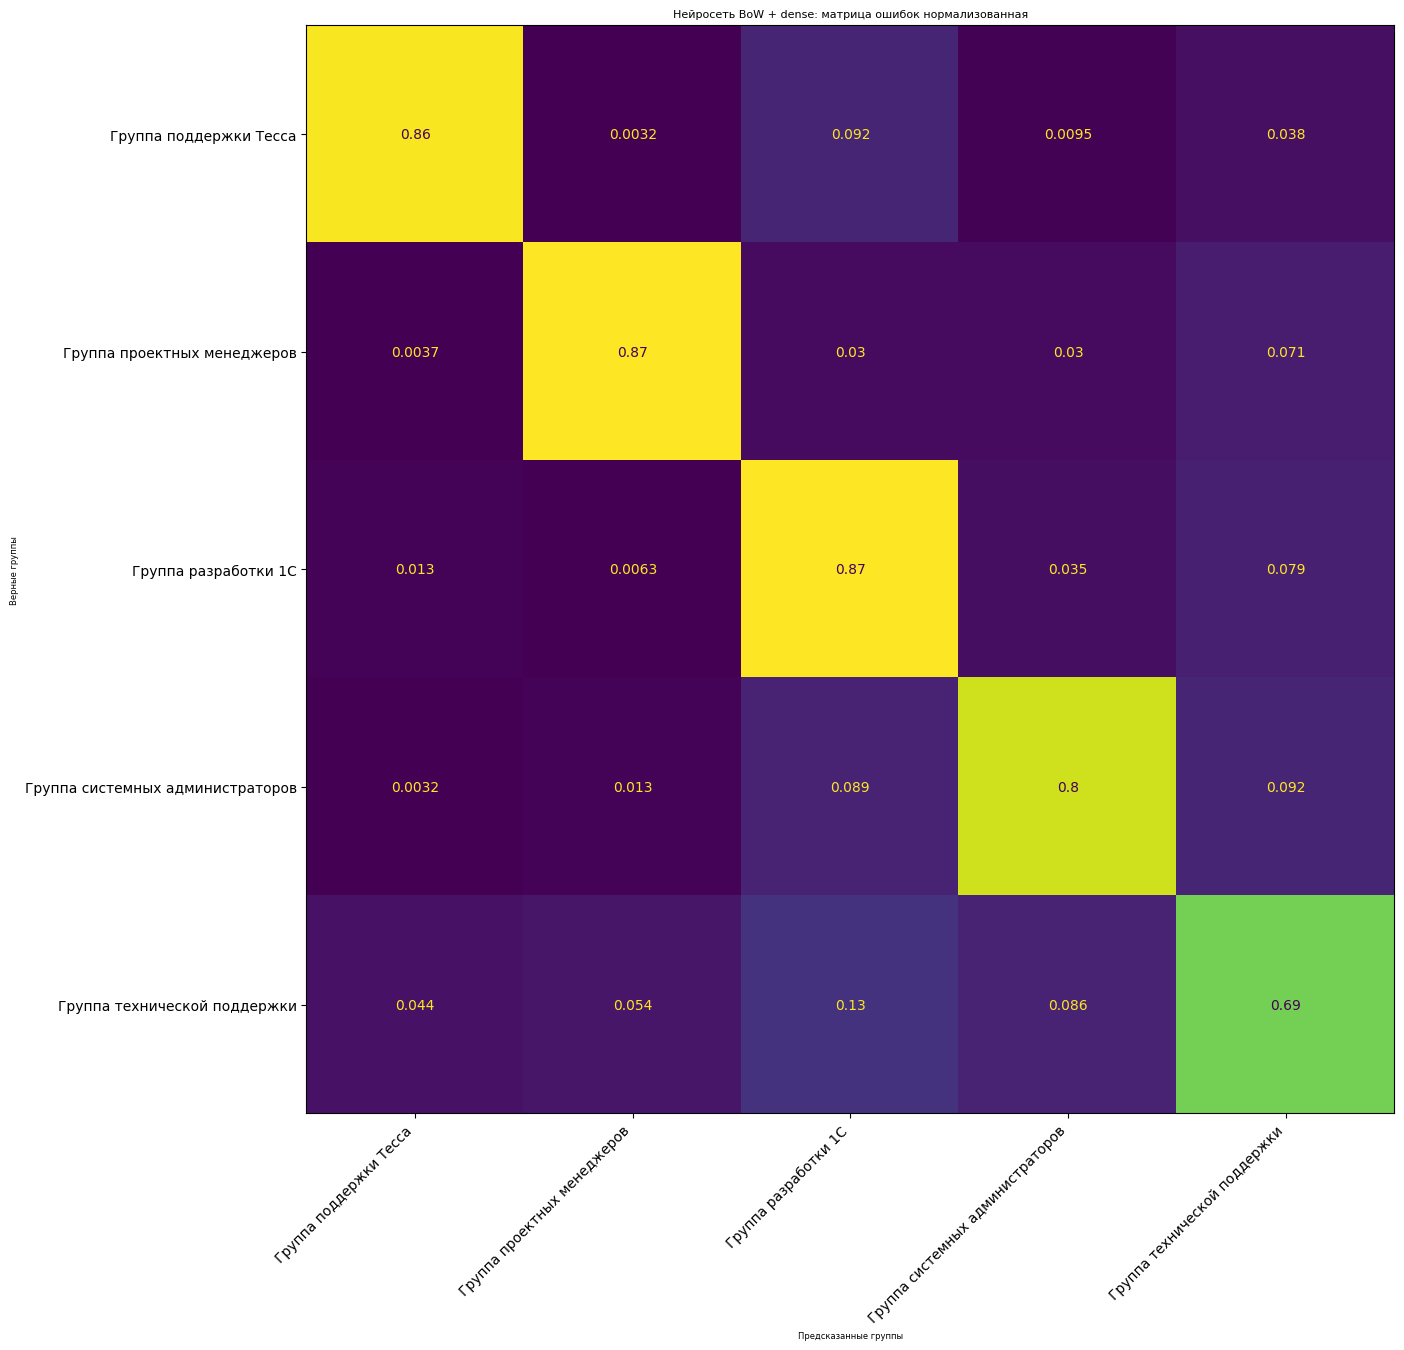

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense
Класс: Группа поддержки Тесса  86% сеть отнесла к группе Группа поддержки Тесса - ВЕРНО :-)
Класс: Группа проектных менеджеров  87% сеть отнесла к группе Группа проектных менеджеров - ВЕРНО :-)
Класс: Группа разработки 1С  87% сеть отнесла к группе Группа разработки 1С - ВЕРНО :-)
Класс: Группа системных администраторов  80% сеть отнесла к группе Группа системных администраторов - ВЕРНО :-)
Класс: Группа технической поддержки  69% сеть отнесла к группе Группа технической поддержки - ВЕРНО :-)

Средняя точность распознавания:  82%


In [ ]:
# Последовательная модель
model_text_bow_dense = Sequential()
# Входной полносвязный слой
model_text_bow_dense.add(Dense(400, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.2))
# Второй полносвязный слой
model_text_bow_dense.add(Dense(600, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.2))
# Третий полносвязный слой
model_text_bow_dense.add(Dense(200, activation='relu'))
# Слой регуляризации Dropout
model_text_bow_dense.add(Dropout(0.2))
# Выходной полносвязный слой
model_text_bow_dense.add(Dense(CLASS_COUNT, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_dense,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         epochs=25,
                         batch_size=128,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='BoW + dense')

In [ ]:
print(model_text_bow_dense)

### Embedding + Dense

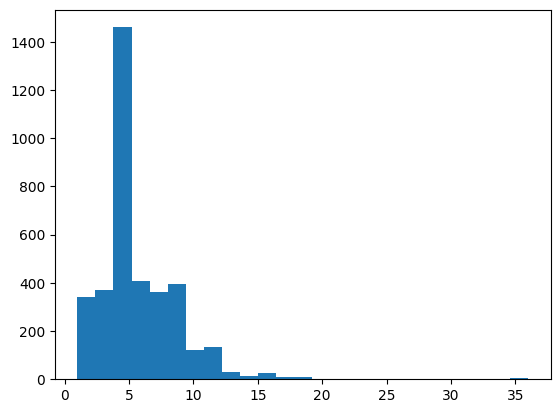

In [ ]:
# Построение гистограммы распределения длин текстов в словах основного набора
seq_len = [len(x) for x in x_data]
plt.hist(seq_len, 25)
plt.show()

In [ ]:
# Снижение размерности входных данных:
# ограничение длины последовательностей до разумного предела
seq_max_len = 400
x_train_clip = pad_sequences(x_train, maxlen=seq_max_len)
x_test_clip = pad_sequences(x_test, maxlen=seq_max_len)

# Проверка формы результата
print(x_train_clip.shape, x_test_clip.shape)

(2585, 400) (1108, 400)


И посмотрите на обучение модели *Embedding + Dense* на обновленной базе:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 50)           900000    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 400, 50)           0         
 alDropout1D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 batch_normalization_4 (Bat  (None, 20000)             80000     
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               2560128   
                                                                 
 dropout_2 (Dropout)         (None, 128)              

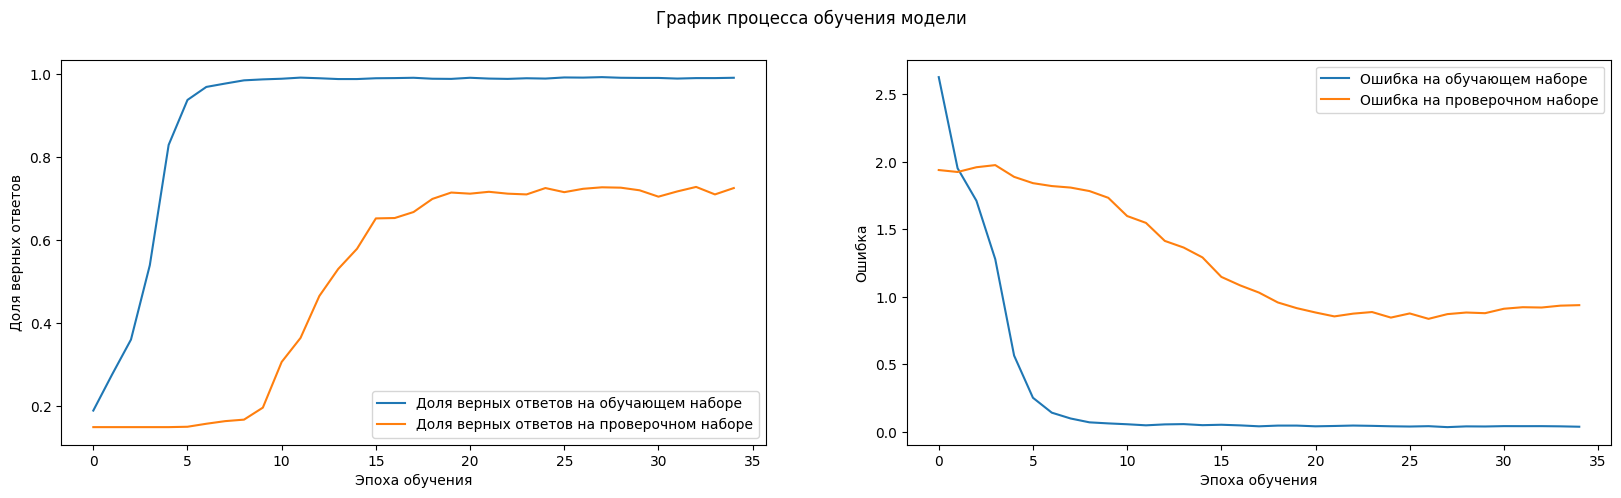

35/35 [==============================] - 0s 2ms/step


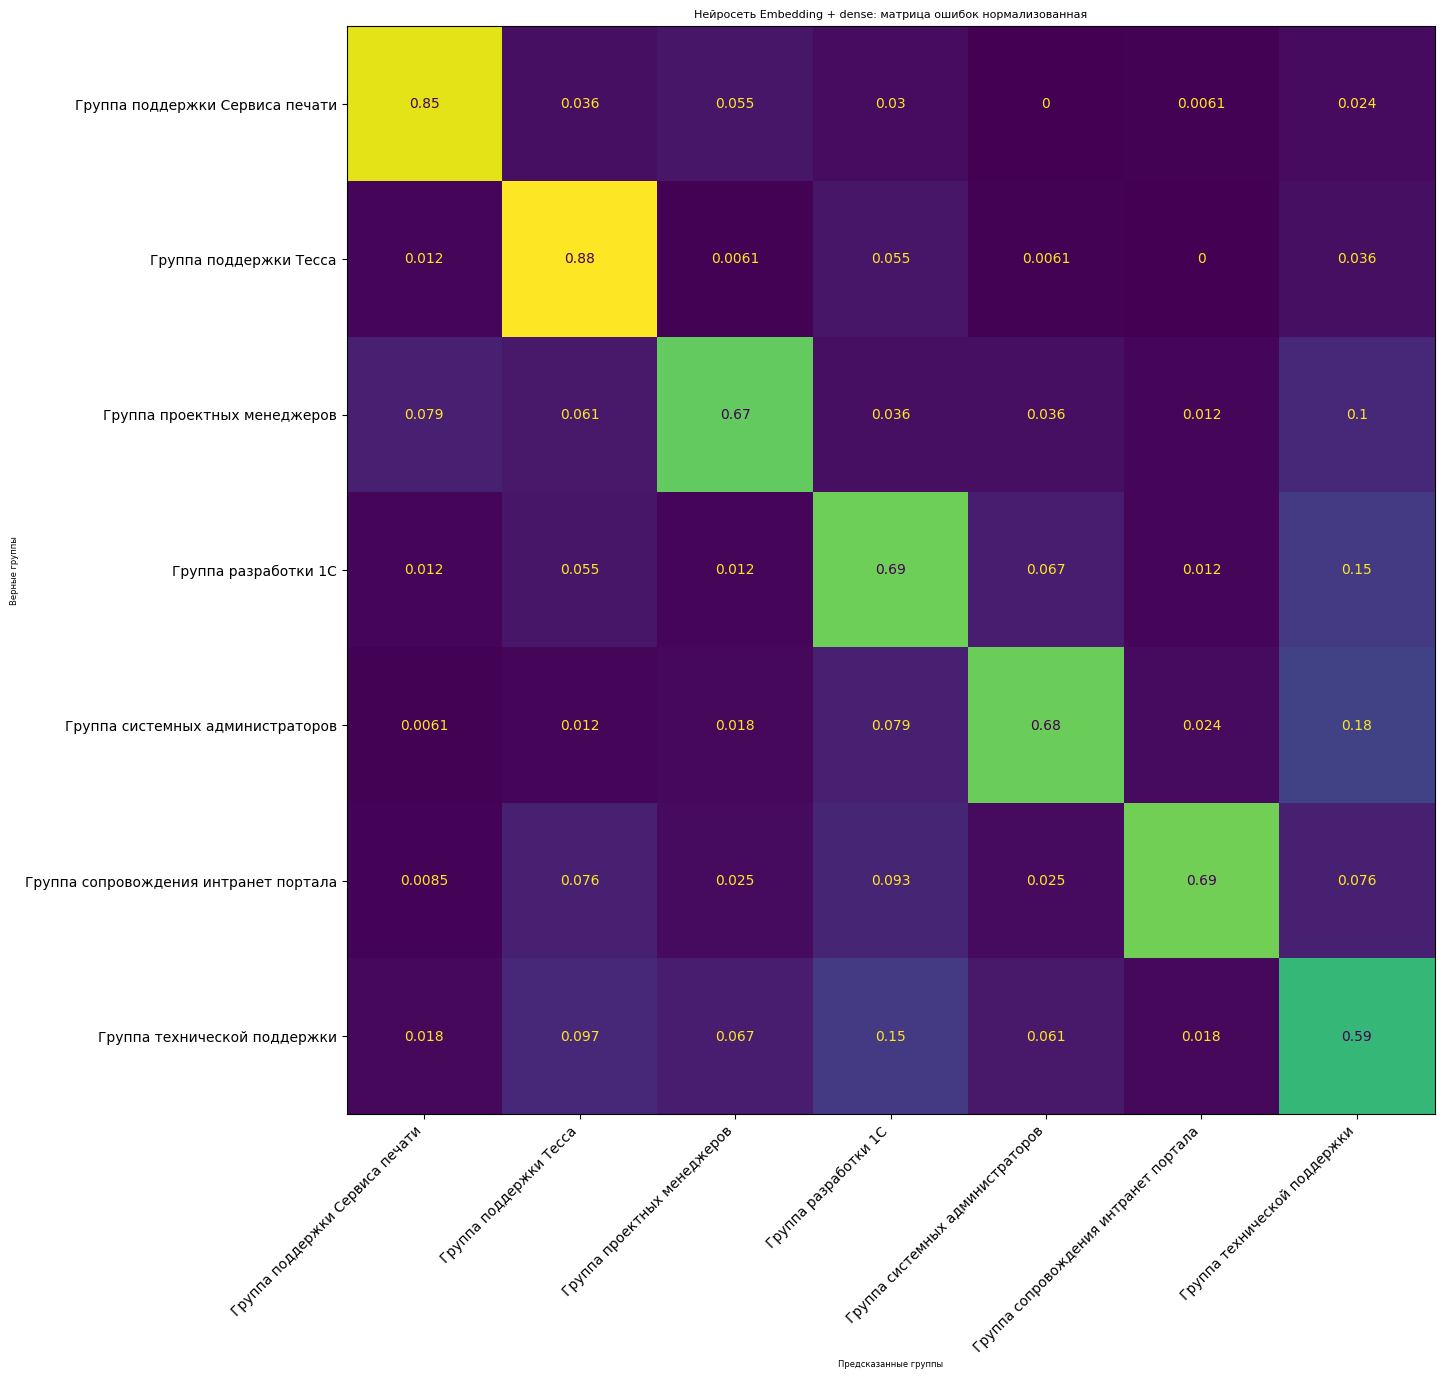

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding + dense
Класс: Группа поддержки Сервиса печати  85% сеть отнесла к группе Группа поддержки Сервиса печати - ВЕРНО :-)
Класс: Группа поддержки Тесса  88% сеть отнесла к группе Группа поддержки Тесса - ВЕРНО :-)
Класс: Группа проектных менеджеров  67% сеть отнесла к группе Группа проектных менеджеров - ВЕРНО :-)
Класс: Группа разработки 1С  69% сеть отнесла к группе Группа разработки 1С - ВЕРНО :-)
Класс: Группа системных администраторов  68% сеть отнесла к группе Группа системных администраторов - ВЕРНО :-)
Класс: Группа сопровождения интранет портала  69% сеть отнесла к группе Группа сопровождения интранет портала - ВЕРНО :-)
Класс: Группа технической поддержки  59% сеть отнесла к группе Группа технической поддержки - ВЕРНО :-)

Средняя точность распознавания:  72%


In [ ]:
# Последовательная модель
model_text_emb_dense = Sequential()
# Cлой эмбеддингов
model_text_emb_dense.add(Embedding(VOCAB_SIZE, 50, input_length=seq_max_len))
# Слой регуляризации Dropout
model_text_emb_dense.add(SpatialDropout1D(0.2))
# Cлой преобразования многомерных данных в одномерные
model_text_emb_dense.add(Flatten())
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Полносвязный слой
model_text_emb_dense.add(Dense(128, activation="relu"))
# Слой регуляризации Dropout
model_text_emb_dense.add(Dropout(0.2))
# Слой пакетной нормализации
model_text_emb_dense.add(BatchNormalization())
# Выходной полносвязный слой
model_text_emb_dense.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_text_emb_dense,
                         x_train_clip, y_train,
                         x_test_clip, y_test,
                         epochs=35,
                         batch_size=128,
                         cm_size=(16, 16),
                         class_labels=CLASS_LIST,
                         title='Embedding + dense')

In [ ]:
print(model_text_emb_dense)

# Telegram-bot

In [ ]:
my_model = model_text_bow_dense # initialize model
my_model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install pyTelegramBotAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.14.0-py3-none-any.whl size=215251 sha256=597bd4cea95cd1314266ea31efb78f8b5ff7450169ecb75ef7ff396b3b6d99a9
  Stored in directory: /root/.cache/pip/wheels/25/51/2d/24b40a366c85c37928d5aa36ddf257e5a79fad25e1ecd11b2c
Successfully built pyTelegramBotAPI


In [ ]:
import telebot
import torch
import re
#import tensorflow
from tensorflow.python.tools import module_util as _module_util
from tensorflow.keras.models import load_model

bot = telebot.TeleBot("5874872380:AAHKajSRguKqT8U4k_BXgffIGO5YbPS-NXE")

# Load pretrained model
model = load_model('my_model.h5')

@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
  bot.reply_to(message, "Привет! Пришлите мне сообщение, и я его классифицирую.")

@bot.message_handler(func=lambda m: True)
def classify_text(message):
  text = message.text

  # Preprocess text
  text = text.lower() # Convert to lowercase
  text = re.sub(r'[^а-яА-я0-9\s]', '', text) # Remove non-alphanumeric characters

  # Tokenize text
  tokenizer = Tokenizer(num_words=10000)
  tokenizer.fit_on_texts([text])
  text = tokenizer.texts_to_sequences([text])

  # Pad sequences
  max_len = 10000
  text = pad_sequences(text, maxlen=max_len, padding='post')

  #with torch.no_grad():
  output = model(text)
  # _, predicted = torch.max(output, 1)

  # Convert to PyTorch Tensor
  output = torch.from_numpy(output.numpy())

  # Now torch.max will work
  _, predicted = torch.max(output, 1)

  # Get class label
  # class_names = ['Группа поддержки Сервиса печати', 'Группа поддержки Тесса', 'Группа проектных менеджеров', 'Группа разработки 1С', 'Группа сопровождения интранет портала', 'Группа системных администраторов', 'Группа технической поддержки']
  class_names = ['Группа поддержки Тесса', 'Группа проектных менеджеров', 'Группа разработки 1С', 'Группа системных администраторов', 'Группа технической поддержки']
  predicted_class = class_names[predicted]

  bot.reply_to(message, f'Это сообщение принадлежит группе: {predicted_class}')

bot.polling()

Вот ник телеграмм-бота с моделью: @Clients_class_bot.